In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

## Mosaic Geometry

Georeferenced EO data sets are often too huge to be stored as one single file and are therefore often tiled and provided in a gridded structure. Geometry-wise, such a structure was realised within the `MosaicGeometry` classes, which represent a well-defined collection of `RasterGeometry` objects. The basic `MosaicGeometry` sets the following requirements to its tiles:

- a tile is represented by a `RasterGeometry` object, so only rectangular shapes are allowed 
- all tiles must have the same CRS
- tiles are not allowed to intersect with each other

The neighbourhood relationship is stored in an adjacency matrix (https://en.wikipedia.org/wiki/Adjacency_matrix), which allows performant spatial queries beyond tile boundaries.

### Initialisation

The constructor of `MosaicGeometry` expects the following arguments:

- `tiles`: List or dictionary containing `RasterGeometry` (or other child classes) instances. In case of a dictionary, the keys must match the raster geometry IDs 
- `adjacency_matrix`: A quadratic adjacency matrix defining the direct neighbourhood relationship. It should only contain booleans or ones/zeros.
- `mosaic_id` (optional): ID of the mosaic
- `description` (optional): Verbal description of the raster geometry
- `check_consistency` (optional): If true, the requirements listed above are checked.
- `parent` (optional): Parent mosaic geometry (important after operations which modify the properties of this mosaic geometry) 

In [2]:
from geospade.crs import SpatialRef
from geospade.raster import RasterGeometry
from geospade.raster import MosaicGeometry

# define spatial reference system
sref = SpatialRef(4326)
# define the tiles of the mosaic
n_rows = 50
n_cols = 50
geotrans = (5, 0.2, 0, 50, 0, -0.2)
tile_1 = RasterGeometry(n_rows, n_cols, sref, geotrans=geotrans, geom_id="Tile 1")
n_rows = 50
n_cols = 50
geotrans = (15, 0.2, 0, 50, 0, -0.2)
tile_2 = RasterGeometry(n_rows, n_cols, sref, geotrans=geotrans, geom_id="Tile 2")
n_rows = 50
n_cols = 50
geotrans = (25, 0.2, 0, 50, 0, -0.2)
tile_3 = RasterGeometry(n_rows, n_cols, sref, geotrans=geotrans, geom_id="Tile 3")
n_rows = 50
n_cols = 75
geotrans = (5, 0.2, 0, 40, 0, -0.2)
tile_4 = RasterGeometry(n_rows, n_cols, sref, geotrans=geotrans, geom_id="Tile 4")
n_rows = 50
n_cols = 75
geotrans = (20, 0.2, 0, 40, 0, -0.2)
tile_5 = RasterGeometry(n_rows, n_cols, sref, geotrans=geotrans, geom_id="Tile 5")

tiles = [tile_1, tile_2, tile_3, tile_4, tile_5] 

# define other attributes of the mosaic
mosaic_id = "Mosaic 1"
mosaic_geom = MosaicGeometry(tiles, mosaic_id=mosaic_id)

This is not the only way to create a mosaic geometry. Similar as for a raster geometry, you can create a mosaic geometry from a JSON-like definition, which contains the adjacency matrix and the mosaic properties in addition to the list of tiles:

In [3]:
import json
json_str = """ 
{
    "id": "Mosaic 1",
    "description": "",
    "tiles": {
        "0": {
            "id": "Tile 1",
            "number_of_rows": 50,
            "number_of_columns": 50,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                5,
                0.2,
                0,
                50,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "1": {
            "id": "Tile 2",
            "number_of_rows": 50,
            "number_of_columns": 50,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                15,
                0.2,
                0,
                50,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "2": {
            "id": "Tile 3",
            "number_of_rows": 50,
            "number_of_columns": 50,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                25,
                0.2,
                0,
                50,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "3": {
            "id": "Tile 4",
            "number_of_rows": 50,
            "number_of_columns": 75,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                5,
                0.2,
                0,
                40,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        },
        "4": {
            "id": "Tile 5",
            "number_of_rows": 50,
            "number_of_columns": 75,
            "spatial_reference": {
                "proj": "longlat",
                "datum": "WGS84",
                "no_defs": true
            },
            "geotransformation": [
                20,
                0.2,
                0,
                40,
                0,
                -0.2
            ],
            "pixel_origin": "ul",
            "description": ""
        }
    },
    "type": "irregular",
    "adjacency_matrix": [
        [
            false,
            true,
            false,
            true,
            false
        ],
        [
            true,
            false,
            true,
            true,
            true
        ],
        [
            false,
            true,
            false,
            false,
            true
        ],
        [
            true,
            true,
            false,
            false,
            true
        ],
        [
            false,
            true,
            true,
            true,
            false
        ]
    ]
}
"""
definition = json.loads(json_str)
mosaic_geom_def = MosaicGeometry.from_definition(definition)

### Properties

A mosaic geometry shares some common attributes with a raster geometry:

In [4]:
mosaic_geom.sref

In [5]:
mosaic_geom.ori

-0.0

In addition, you can access the tiles via

In [6]:
mosaic_geom.tiles

, and the tile IDs via

In [7]:
mosaic_geom.tile_ids

['Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5']

### Plotting

A mosaic geometry offers a simple wrapper to plot each tile, with almost the same keywords as for the `plot()` function of a raster geometry. 

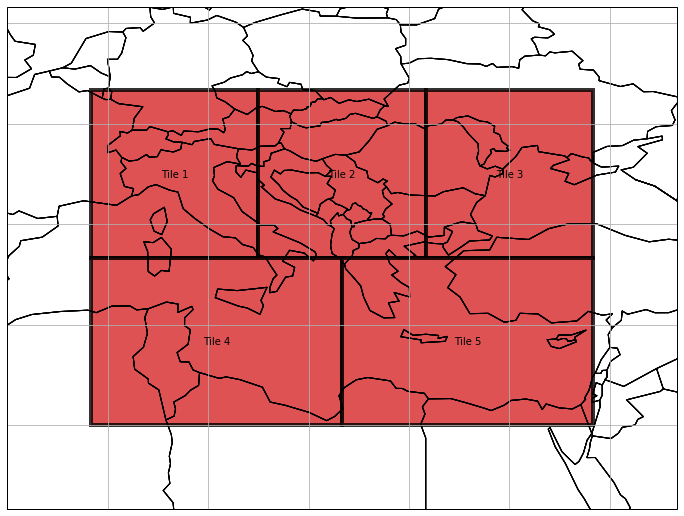

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
mosaic_geom.plot(label_tiles=True, edgewidth=4, alpha=0.8, extent=[0, 25, 40, 55])

### Tile Access

There are several options to access a tile within a mosaic geometry. First you can use brackets with a tile ID to get a tile object from a mosaic.

In [9]:
tile_11 = mosaic_geom['Tile 1']

If you want to know which tile is covering a coordinate tuple, you can use

In [10]:
tile_12 = mosaic_geom.xy2tile(5.25, 49.6)

Both tiles should be the same:

In [11]:
tile_11 == tile_12

True

There is also the possibility to get the direct neighbours of one tile:

In [12]:
mosaic_geom.get_neighbouring_tiles('Tile 1')

### Subsetting

Instead of retrieving single tiles from a spatial query, you can also create a subset mosaic by intersecting the original mosaic geometry with another geometry. Thereby, the tiles are fully preserved and only a new mosaic geometry, i.e. having a new ID, adjacency matrix and description, is returned.

In [13]:
from osgeo import osr
from osgeo import ogr
from shapely.geometry import Polygon

polygon = Polygon([(10, 47), (17, 41), (15, 35), (7, 33), (10, 47)])
ogr_geom = ogr.CreateGeometryFromWkt(polygon.wkt)
ogr_geom.AssignSpatialReference(sref.osr_sref)

mosaic_geom_intsct = mosaic_geom.subset_by_geom(ogr_geom)

<Figure size 864x864 with 0 Axes>

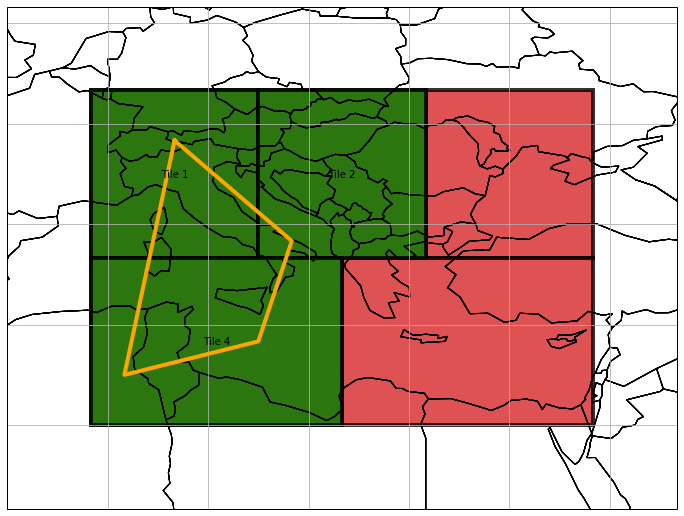

In [14]:
plt.figure(figsize=(12, 12))
x_coords, y_coords = polygon.exterior.xy
plt.figure(figsize=(12, 12))
ax = mosaic_geom.plot(label_tiles=False, edgewidth=4, alpha=0.8, extent=[0, 25, 40, 55])
mosaic_geom_intsct.plot(ax=ax, label_tiles=True, edgewidth=4, alpha=0.8, facecolor='green', extent=[0, 25, 40, 55])
ax.plot(x_coords, y_coords, color='orange', linewidth=4)

### Slicing 

Similar to to the previous operation and a raster geometry, you can also slice a `MosaicGeometry` object, either by a geometry (`slice_by_geom`) or a coordinate window/bbox (`slice_by_xy`).

<Figure size 864x864 with 0 Axes>

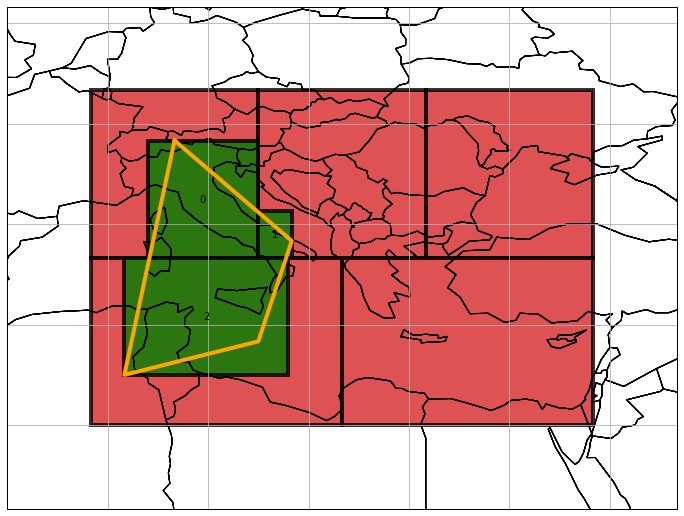

In [15]:
mosaic_geom_intsct = mosaic_geom.slice_by_geom(ogr_geom)

plt.figure(figsize=(12, 12))
x_coords, y_coords = polygon.exterior.xy
plt.figure(figsize=(12, 12))
ax = mosaic_geom.plot(label_tiles=False, edgewidth=4, alpha=0.8, extent=[0, 25, 40, 55])
mosaic_geom_intsct.plot(ax=ax, label_tiles=True, edgewidth=4, alpha=0.8, facecolor='green', extent=[0, 25, 40, 55])
ax.plot(x_coords, y_coords, color='orange', linewidth=4)

## Regular Mosaic Geometry

With respect to `MosaicGeometry`, `RegularMosaicGeometry` sets some further requirements to its tiles:

- same pixel size
- same shape

This structure paves the path for more performant spatial queries and solving neighbourhood relationships. Such relationships are also encoded in an adjacency matrix, but this time not in a binary format. The dimensions of the matrix refer to the dimensions of the mosaic (e.g. number of tiles in S and W direction) and its entries to a tile ID.

An additional classmethod `from_rectangular_definition` can help to create a regular mosaic geometry: 

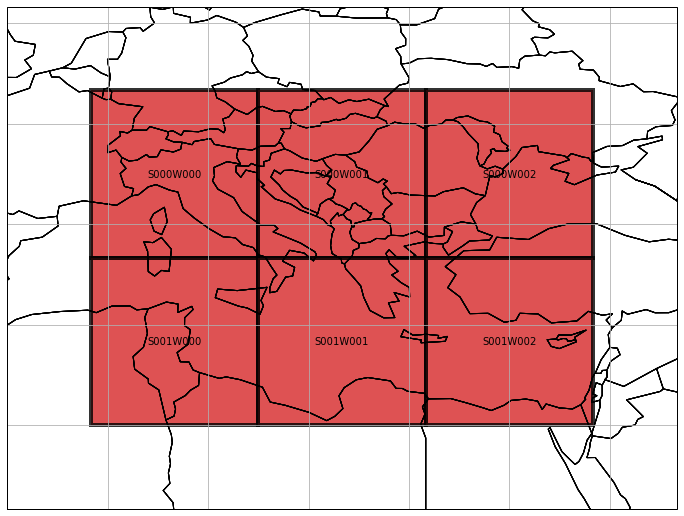

In [16]:
from geospade.raster import RegularMosaicGeometry

mosaic_ul_x = 5
mosaic_ul_y = 50
mosaic_rows = 2
mosaic_cols = 3
x_tile_size = 10.
y_tile_size = 10.
geotrans = (mosaic_ul_x, 0.2, 0., mosaic_ul_y, 0., -0.2)

reg_mosaic_geom = RegularMosaicGeometry.from_rectangular_definition(mosaic_rows, mosaic_cols, x_tile_size,
                                                                    y_tile_size, sref, geotrans=geotrans)

plt.figure(figsize=(12, 12))
reg_mosaic_geom.plot(label_tiles=True, edgewidth=4, alpha=0.8, extent=[0, 25, 40, 55])

### Properties

A regular mosaic geometry has the same properties as a basic mosaic geometry, except an additional shape property.

In [17]:
reg_mosaic_geom.shape

(2, 3)

### Subsetting

Subsetting a regular mosaic geometry works the same as for a basic raster geometry. The mosaic tile structure is fully preserved, except the mosaic ID, adjacency matrix and description.

### Slicing 

For slicing operations, both mosaic geometry definitions differ. A regular raster geometry slicing operation does not return a new `RegularMosaicGeometry` instance. Instead, a `MosaicGeometry` intstance is returned, because slicing does interfere with the outlined requirements for a regular mosaic geometry.